** IMPORTANT NOTE - **
> Please proceed with this Notebook <u>**_iff_**</u> you are familiar with foundation of Microsoft Azure public cloud. 
> In this notebook, the basics of Microsoft Azure and its development methodology is not covered. As it is beyond the scope of this notebook.

For those who would like to provision and understand further about Azure Machine Learning Service (AML)  - Here is the landing page on [MS Azure ML Service](https://azure.microsoft.com/en-in/services/machine-learning/)



# Azure Machine Learning Series - I
This will be series of notebook tutorials starting from the beginning of the fundamentals of AML service.

## Introduction
Azure Machine Learning (*Azure ML*) is a cloud-based service for creating and managing machine learning solutions. It's designed to help data scientists leverage their existing data processing and model development skills and frameworks, and help them scale their workloads to the cloud. The Azure ML SDK for Python provides classes you can use to work with Azure ML in your Azure subscription.
<br/>**Heads-Up:** https://channel9.msdn.com/Shows/AI-Show/Allup-Azure-ML

In this <u>first notebook</u> I will discuss about the nitty-gritty of Azure ML service: -
* Creating an instance of Azure ML service
* Downloading libraries/dependencies (in Kaggle environment)
* Various methods to connect to Azure ML service workspace: using config file and using get() method.
* Simple ML experiment -  for data exploration. Capture the details from the experiment, logging and preserving the run details from the experiment. 
* Overview of Azure ML Service Dashboard & Experiment Dashboard.

### Check the Azure ML SDK Version
Let's start by importing the **azureml-core** package and checking the version of the SDK that is installed.


In [ ]:
# import the Azure ML libs.

!pip install azureml
!pip install azureml.core
!pip install azureml.widgets

In [ ]:
import azureml.core
import azureml.widgets 
print("Ready to use Azure ML", azureml.core.VERSION)

## Connect to Your Workspace
All experiments and associated resources are managed within you Azure ML workspace. You can connect to an existing workspace, or create a new one using the Azure ML SDK.

### Workspace Configuration
> IDEALLY - In most cases, you should store the workspace configuration in a JSON configuration file. This makes it easier to reconnect without needing to remember details like your Azure subscription ID. You can download the JSON configuration file from the blade for your workspace in the Azure portal, but if you're using a Compute Instance within your workspace, the configuration file has already downloaded to the root folder.

**In this example**: I am going to use *Workspace.get()* method to instantiate the previously created workspace.

The first time for this notebook session,  it will be prompt to sign into Azure by clicking the https://microsoft.com/devicelogin link,  entering an automatically generated code, and signing into Azure.

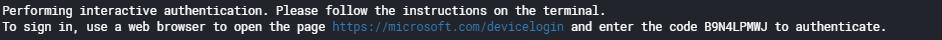


In [ ]:
from azureml.core import Workspace

## in this segment you should replace the 3-parameters values according to the workspace available in the subscription
## this experiment will not work beyond this point if these values are not appropriately inserted.
## HENCE, THE Notebook Execution will terminate


## Example - 
    ## ws = Workspace.get(name="<<MLSERVICENAME>>", subscription_id='<<GUID - ML Service ID>>', resource_group='<<Hosting Azure Resource Group>>')

# Pulling values from Kaggle Secrets

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
MLServiceName = user_secrets.get_secret("MLServiceName")
az_resource_grp = user_secrets.get_secret("az_resource_grp")
sub_id = user_secrets.get_secret("sub_id")

## Instanciating the Workspace object.
ws = Workspace.get(name=MLServiceName, subscription_id=sub_id, resource_group=az_resource_grp)
print(ws.name, "loaded")

## ML Experiment

I am going to use an Azure ML *experiment* to run Python code and record values extracted from data. In this case, i will use a simple dataset the famous IRIS. I will run an experiment to explore the data, extracting statistics, visualizations, and data samples. In this experiment I will also show how we can use an Azure ML *experiment* to log details of the each run.

In [ ]:
from azureml.core import Experiment
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Create an Azure ML experiment in your workspace
experiment = Experiment(workspace = ws, name = "simple-experiment")

# Start logging data from the experiment
run = experiment.start_logging()
print("Starting experiment:", experiment.name)

# load the data from a local file
data = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')

# Count the rows and log the result
row_count = (len(data))

# IMPORTANT: Log statistical value from this Experiment's run 
run.log('observations', row_count)
print('Analyzing {} rows of data'.format(row_count))

# IMPORTANT: Log plot image (log_image()) from this Experiment's run 
iris_counts = data['species'].value_counts()
fig = plt.figure(figsize=(6,6))
ax = fig.gca()    
iris_counts.plot.bar(ax = ax) 
ax.set_title('Count of Iris Species') 
ax.set_xlabel('Species') 
ax.set_ylabel('Instance Count')
plt.show()
run.log_image(name = 'label distribution', plot = fig)

# IMPORTANT: log distinct counts as a list using log_list from the Experiment's run
species = data['species'].unique()
run.log_list('species categories', species)

# IMPORTANT: log summary statistics as a row using log_row from the Experiment's run
features_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
summary_stats = data[features_columns].describe().to_dict()
for col in summary_stats:
    keys = list(summary_stats[col].keys())
    values = list(summary_stats[col].values())
    for index in range(len(keys)):
        run.log_row(col, stat = keys[index], value = values[index])
        
# Save a sample of the data and upload it to the experiment output
data.sample(100).to_csv('../sample.csv', index=False, header=True)
run.upload_file(name = 'outputs/sample.csv', path_or_stream = '../sample.csv')

# Complete the run
run.complete()

## View Experiment Results

After the experiment has been finished, you can use the **run** object to get information about the run and its outputs:

In [ ]:
import json

# Get run details
details = run.get_details()
print(details)

# Get logged metrics
metrics = run.get_metrics()
print(json.dumps(metrics, indent=2))

# Get output files
files = run.get_file_names()
print(json.dumps(files, indent=2))

## Azure ML workspace
The service is battleground for every data scientist, as it enable ML engineer to perform every aspect of Machine learning project - 
1. Curate Data, Datastores, Datasets and processing Pipelines
2. Provision Compute - CPU/GPU/TPU any many more
3. Run and track experiments.
4. Model provsioning and source control, versioning, etc.. 
5. Model Deployments - various formats,various platforms
6. Monitoring, troubleshootind, logging
7. Storage and data analysis.

to learn further on the introduction  pl look into this url  - 
https://channel9.msdn.com/Shows/AI-Show/Allup-Azure-ML

## ML Experiment dashboard 
Following are the noteworthy points from this dashboard:
1. Name of the experiment is "simple-experiment"
2. Gives the details of each run of this experiment. 
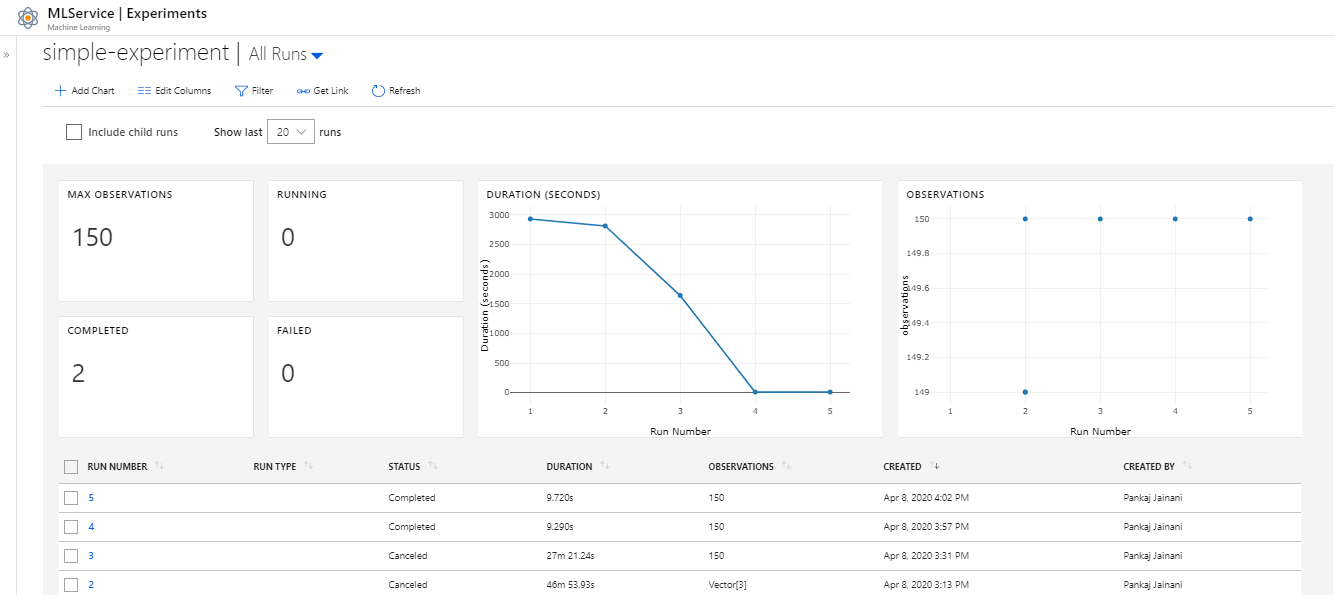



### Digging into individual experiment's run.
gives us the charts, attributes, tracked metrics (as described in the code), and tracked images/charts from the run.
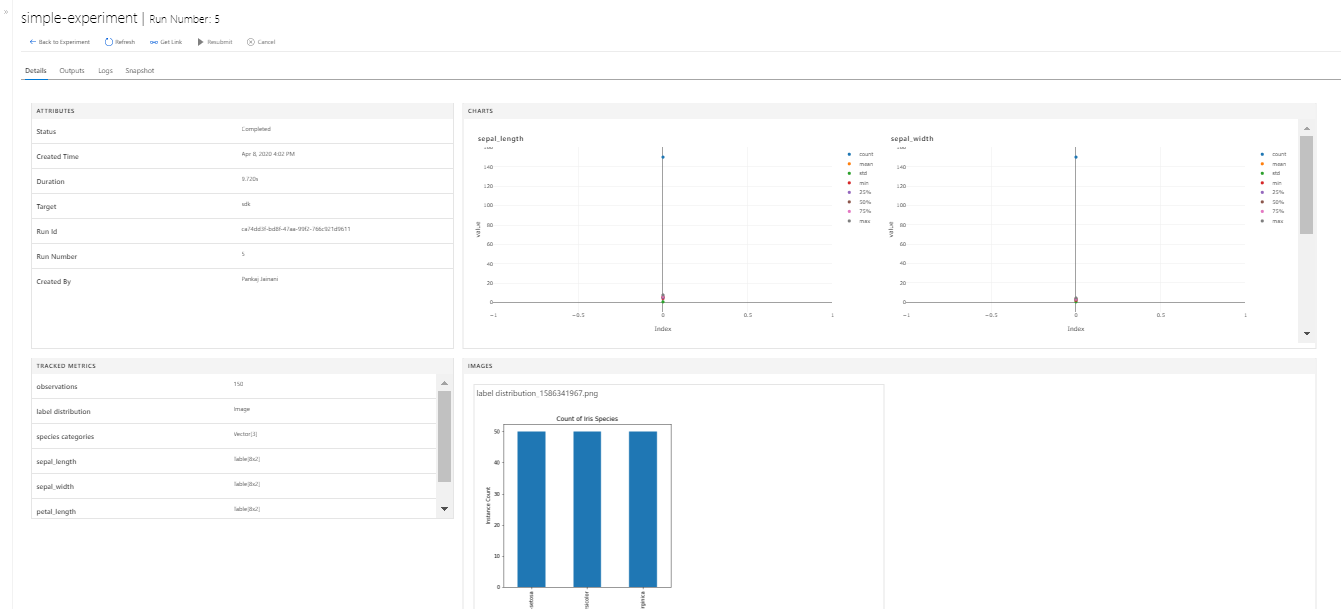

### Outputs
as per the details captured in the code - 
Output file (100 records) and Lebel Distribution Image


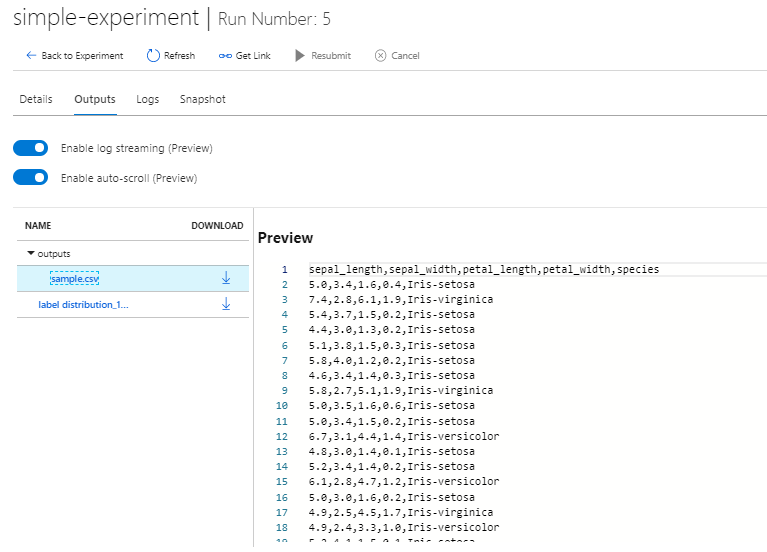

### What Next - 
In the next notebook I will explain about the details of:

* Create and run the experiment using Custom Script file. Implementing simple Logistic Regression model on IRIS dataset.
* **RunConfiguration** and **ScriptRunConfiguration**, using these AML classes to define the runtime environment for the custom script.
* Output the model and run details to the external folder for future referencing.